# Welcome to the ~~Dark~~ Data Side:
## Which Star Wars movie do people like most and who is most likely to have seen Star Wars?

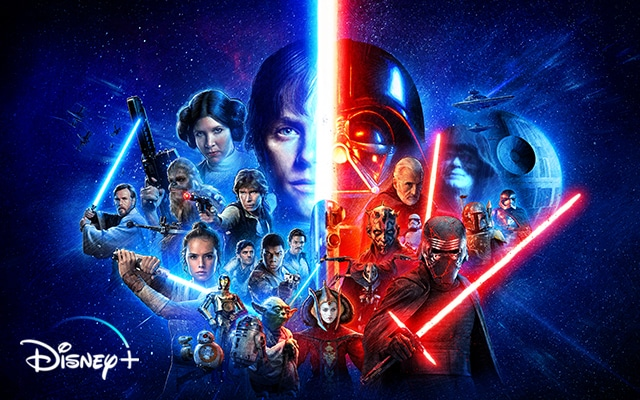

FiveThirtyEight asked the question **"Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?"**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

Some of the variables in this dataset include:

| Variable | Description |
|:---|:---|
| RespondentID  |  An   anonymized ID for the respondent (person taking the survey) |
| Gender  |  the respondent's gender |
| Age  |  the respondent's age |
| Household   Income  |  the respondent's income |
| Education  |  the respondent's education level |
| Location   (Census Region)  |  the respondent's location |
| Have you   seen any of the 6 films in the Star Wars franchise?  |  Yes/No |
| Do you   consider yourself to be a fan of the Star Wars film franchise?  |  Yes/No |

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Looking at the initial dataset

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [94]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [95]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We can see there are several columns with poor naming conventions ("Unnamed...") that have verbose values that could be replaced with simpler values like True/False.

## Data Cleaning

In [96]:
# Changing yes/no to True/False for easier calculations
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] =  star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({"Yes":True,"No":False})
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] =  star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({"Yes":True,"No":False})

In [97]:
# Converting the checkmark survey columns into more readable boolean columns with each column representing one movie.
title_map = {'Star Wars: Episode I  The Phantom Menace':True,'Star Wars: Episode II  Attack of the Clones':True,
            'Star Wars: Episode III  Revenge of the Sith':True,'Star Wars: Episode IV  A New Hope':True,
            'Star Wars: Episode V The Empire Strikes Back':True,'Star Wars: Episode VI Return of the Jedi':True}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(title_map).fillna(False)

In [98]:
# Renaming columns to better fit the screen as well as provide more information for columns with names like 'Unnamed...'
star_wars = star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?':'seen_any',
                                      'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan',
                                      'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                      'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5',
                                      'Unnamed: 8':'seen_6','Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ep1_rank',
                                     'Unnamed: 10':'ep2_rank','Unnamed: 11':'ep3_rank','Unnamed: 12':'ep4_rank',
                                     'Unnamed: 13':'ep5_rank','Unnamed: 14':'ep6_rank'})

## Analysis
### Average Rating for Each Movie

In [99]:
ranking_avgs=star_wars[star_wars.columns[9:15]].mean()

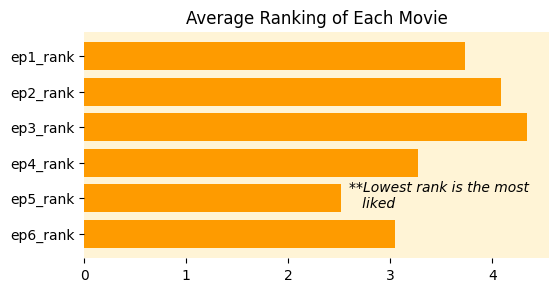

In [100]:
fig,ax = plt.subplots(figsize=(6,3))
rankings = ax.barh(ranking_avgs.index,ranking_avgs,color='#fe9b00')
ax.set_facecolor('#fff4d6')
plt.title('Average Ranking of Each Movie')
# plt.xticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().invert_yaxis()
plt.text(2.6,4.25,'**Lowest rank is the most\n   liked',fontstyle='italic')
plt.show()

From the averages above Episode 5 (Empire Strikes Back) is the highest rated movie by far. The "prequels" (Episodes 1, 2, and 3) were generally less well-received than the originals, so it makes sense that their ratings were lower overall than the original trilogy.

### Total Number of Survey Respondents Who Have Seen Each Movie

In [101]:
tot_seen = star_wars[star_wars.columns[3:9]].sum()

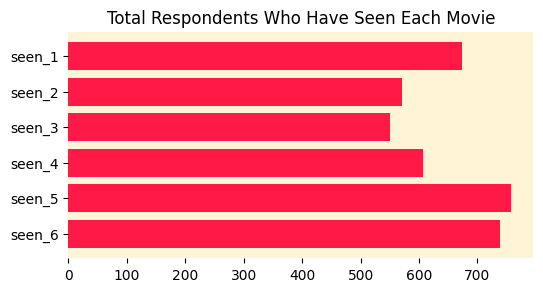

In [102]:
fig,ax = plt.subplots(figsize=(6,3))
rankings = ax.barh(tot_seen.index,tot_seen,color='#ff1947')
ax.set_facecolor('#fff4d6')
plt.title('Total Respondents Who Have Seen Each Movie')
# plt.xticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

The number of respondents who have seen each movie seems to have a correlation with rankings (with the highest ranked movie, Episode 5, also having the highest number of viewings). This could be because of a few things:
* The original trilogy (episodes 4, 5, and 6) have been around much longer so more people have had a chance to view them
* People prioritize watching things that are enjoyable, so maybe people knew that the original trilogy was better rated than the prequels so the spent their time watching the originals instead

### Does Gender Matter with Star Wars?

In [103]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

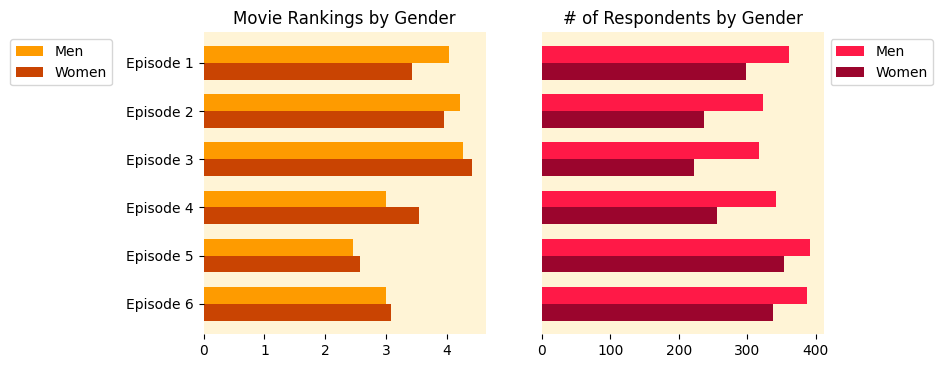

In [104]:
male_ranking_avgs=males[males.columns[9:15]].mean()
female_ranking_avgs = females[females.columns[9:15]].mean()

male_tot_seen = males[males.columns[3:9]].sum()
female_tot_seen = females[females.columns[3:9]].sum()

ind = np.arange(6)
height = 0.35

fig,ax = plt.subplots(1,2,figsize=(8,4))
malebar = ax[0].barh(ind,male_ranking_avgs,color='#fe9b00',height=height)
femalebar = ax[0].barh(ind+height,female_ranking_avgs,color='#c94402',height=height)
ax[0].set_facecolor('#fff4d6')
ax[0].set_title('Movie Rankings by Gender')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels(('Episode 1','Episode 2','Episode 3','Episode 4','Episode 5',
                   'Episode 6'))
ax[0].legend((malebar[0], femalebar[0]), ('Men', 'Women'),bbox_to_anchor=[-0.3,1])
ax[0].invert_yaxis()

male2bar = ax[1].barh(ind,male_tot_seen,color='#ff1947',height=height)
female2bar = ax[1].barh(ind+height,female_tot_seen,color='#9b052d',height=height)
ax[1].set_facecolor('#fff4d6')
ax[1].set_title('# of Respondents by Gender')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_yticks([])
# ax[1].set_yticklabels(('Episode 1','Episode 2','Episode 3','Episode 4','Episode 5',
#                    'Episode 6'))
ax[1].legend((male2bar[0], female2bar[0]), ('Men', 'Women'),bbox_to_anchor=[1,1])
ax[1].invert_yaxis()
plt.show()

Episode 5 was highest ranked among both men and women, but the ranking differences between the genders was negligible with a slight exception for Episode 4. Men tended to rank Episode 4 slightly higher than women. Overall more men have seen each of the 6 films than women survey respondents, with the two most popular movies among each gender being Episode 5 and 6.

### Star Wars Fans vs. Non-Fans

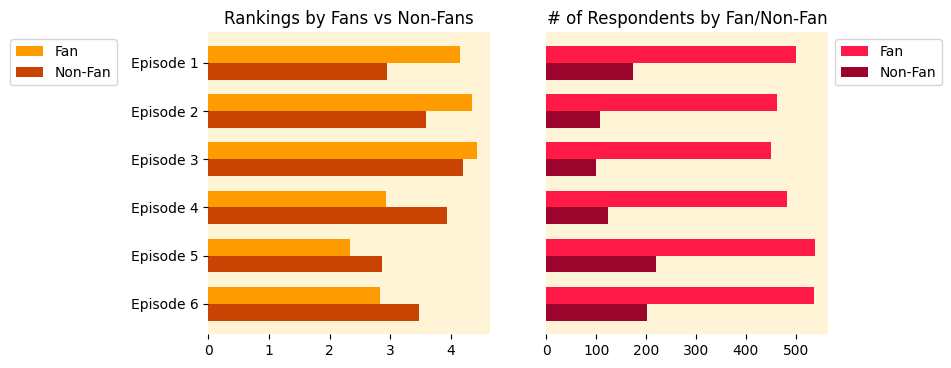

In [105]:
fans = star_wars[star_wars["fan"] == True]
non_fans = star_wars[star_wars['fan'] == False]

fan_ranking_avgs=fans[fans.columns[9:15]].mean()
non_fan_ranking_avgs = non_fans[non_fans.columns[9:15]].mean()

fan_tot_seen = fans[fans.columns[3:9]].sum()
non_fan_tot_seen = non_fans[non_fans.columns[3:9]].sum()

ind = np.arange(6)
height = 0.35

fig,ax = plt.subplots(1,2,figsize=(8,4))
fanbar = ax[0].barh(ind,fan_ranking_avgs,color='#fe9b00',height=height)
nonfanbar = ax[0].barh(ind+height,non_fan_ranking_avgs,color='#c94402',height=height)
ax[0].set_facecolor('#fff4d6')
ax[0].set_title('Rankings by Fans vs Non-Fans')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels(('Episode 1','Episode 2','Episode 3','Episode 4','Episode 5',
                   'Episode 6'))
ax[0].legend((fanbar[0], nonfanbar[0]), ('Fan', 'Non-Fan'),bbox_to_anchor=[-0.3,1])
ax[0].invert_yaxis()

fan2bar = ax[1].barh(ind,fan_tot_seen,color='#ff1947',height=height)
nonfan2bar = ax[1].barh(ind+height,non_fan_tot_seen,color='#9b052d',height=height)
ax[1].set_facecolor('#fff4d6')
ax[1].set_title('# of Respondents by Fan/Non-Fan')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_yticks([])
# ax[1].set_yticklabels(('Episode 1','Episode 2','Episode 3','Episode 4','Episode 5',
#                    'Episode 6'))
ax[1].legend((fan2bar[0], nonfan2bar[0]), ('Fan', 'Non-Fan'),bbox_to_anchor=[1,1])
ax[1].invert_yaxis()
plt.show()

Fans had much stronger ranking preference for the original trilogy than non-fans, who slightly preferred Episode 5 better than others in the series, but they also liked Episode 1 (so can their opinion really be trusted?).

The number of non-fans who have seen each movie also was much lower than the number of fans who had seen each movie. This makes sense -- if you don't like a franchise why would you watch the movies? Episode 5 and 6 still had the highest viewership among fans and non-fans alike.

### Does Education Level Matter?

In [133]:
star_wars_edu = star_wars.groupby('Education').agg(['mean','sum'])
star_wars_edu.drop('RespondentID',axis=1,inplace=True)

display(star_wars_edu['seen_any'])

,mean,sum
Education,,
Bachelor degree,0.816199,262.0
Graduate degree,0.821818,226.0
High school degree,0.676190,71.0
Less than high school degree,0.428571,3.0
Some college or Associate degree,0.774390,254.0


Although the number of responses is smaller for respondents without any college education, it is still enough to warrant further analysis. It does appear significant that respondents with a High School Degree have seen Star Wars at least 10% less than respondents with some college education.

In [134]:
star_wars['Age']=pd.Categorical(star_wars['Age'],categories = ['18-29','30-44','45-60','> 60'],ordered=True)
college = star_wars[(star_wars['Education'] == 'Bachelor degree') | (star_wars['Education'] == 'Graduate degree') | 
                    (star_wars['Education'] == 'Some college or Associate degree')]
high_school = star_wars[(star_wars['Education'] == 'High school degree') | (star_wars['Education'] == 'Less than high school degree')]

college_mean = college['seen_any'].mean()
high_school_mean = high_school['seen_any'].mean()

In [111]:
import scipy

scipy.stats.chisquare([742,182,74,38],f_exp=[727.78,196.22,88.22,23.78])

Power_divergenceResult(statistic=12.103750944275035, pvalue=0.007036073612326179)

A simple Chi Squared test confirms that we can reject the null hypothesis. Education level does impact whether or not an individual has seen any Star Wars movies, but let's ensure that `Age` is not a confounding variable.

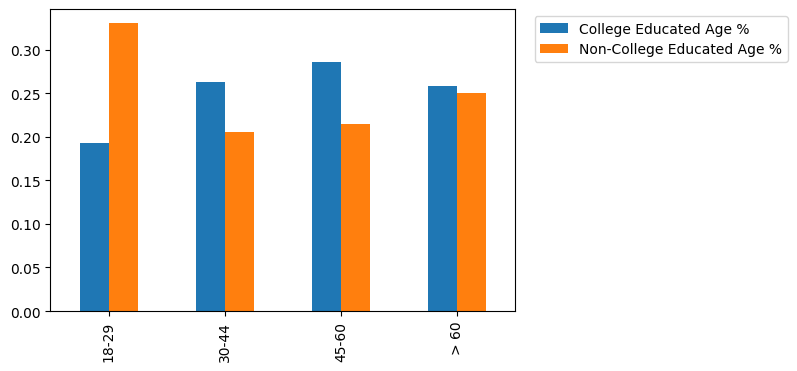

In [121]:
age_compare = pd.concat([(college['Age'].value_counts(dropna=False)/college.shape[0]),
          (high_school['Age'].value_counts(dropna=False)/high_school.shape[0])],axis=1)
age_compare.columns = ['College Educated Age %','Non-College Educated Age %']
age_compare.plot.bar()
plt.legend(bbox_to_anchor=[1.6,1])
plt.show()

In [128]:
star_wars_age = star_wars.groupby(['Age','Education']).agg(['mean','sum'])
star_wars_age['seen_any']

mean   sum
Age   Education                                       
18-29 Bachelor degree                   0.849315  62.0
      Graduate degree                   0.880000  22.0
      High school degree                0.727273  24.0
      Less than high school degree      0.500000   2.0
      Some college or Associate degree  0.850000  68.0
30-44 Bachelor degree                   0.766667  69.0
      Graduate degree                   0.805195  62.0
      High school degree                0.772727  17.0
      Less than high school degree      1.000000   1.0
      Some college or Associate degree  0.763158  58.0
45-60 Bachelor degree                   0.888889  88.0
      Graduate degree                   0.865169  77.0
      High school degree                0.652174  15.0
      Less than high school degree      0.000000   0.0
      Some college or Associate degree  0.776316  59.0
> 60  Bachelor degree                   0.728814  43.0
      Graduate degree                   0.773810  65.0
      High school degree                0.555556  15.0
      Less than high school degree      0.000000   0.0
      Some college or Associate degree  0.718750  69.0

In the 18-29 age bracket there is still a noticable difference in the percentage of survey respondents who have seen star wars vs not seen star wars based on education level. This helps solidify that education level (and not age) is an important factor in whether someone has seen Star Wars or not.

## Conclusion

* Episode 5 was the highest rated movie by respondents
* Star Wars Prequels (Episodes 1 - 3) were generally rated lower than the original 3 movies (Episodes 4 - 6)
* More men than women have seen Star Wars (both generally and by episode)
* Fans strongly prefer the original trilogy to the prequels, whereas non-fans are somewhat indifferent
* Non-fans are far less-likely to have seen the movies compared to fans
* Education level matters when considering whether a person has seen at least one Star Wars movie

**Next Steps**

I was very surprised by the education level affecting the movie viewership so significantly and I am curious if this holds for the other fandoms this survey asked about as well (Star Trek, Expanded Universe) or if there are other potential confounding variables (i.e. income level, location). I would want to explore these relationships and see if I could get a better picture of why education data was so interesting.